<a href="https://colab.research.google.com/github/iitkgroup21/EE954_ASSIGNMENT_GR21/blob/anup_changes/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Dataset
### Context

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

### Key Characteristics

* **Image Resolution:** Each image in the MNIST dataset is 28x28 pixels, with a single color channel (grayscale).
* **Number of Classes:** The dataset has 10 classes, representing the digits 0 through 9.
* **Color Format:** Grayscale (1 channel), with pixel values ranging from 0 to 255 in the raw data. After applying transforms.ToTensor(), these values are scaled between 0 and 1.

### Dataset Composition
* **Training Set:** 60,000 images, used for training models.
* **Test Set:** 10,000 images, used for evaluating model performance.

### Typical Usage
The dataset is often divided into three subsets for practical machine learning workflows:

* **Training Set (90% of the original training data)**: Used for training the model on 54,000 images.
* **Validation Set (10% of the original training data):** Used for tuning hyperparameters and preventing overfitting, with 6,000 images.
* **Test Set (100% of the original Testing data):** Used for final evaluation, with 10,000 images.

#### Labels

Each training and test example is assigned to one of the following labels:

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot


#### Transformation

* **ToTensor:** Converts each image to a PyTorch tensor and scales the pixel values to the range [0, 1].



## Basic concepts of CNN model :

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm that can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image, and be able to differentiate one from the other.

Three basic components to define a basic convolutional neural network.

*   The Convolutional Layer
*   The Pooling layer
*   The Output layer

![](https://media.licdn.com/dms/image/v2/D5612AQGOui8XZUZJSA/article-cover_image-shrink_600_2000/article-cover_image-shrink_600_2000/0/1680532048475?e=1735776000&v=beta&t=Evq_XWpAo5JDVF4dy5tw2L8E7KDUgYwDrKtnTi5Go_I)





# Code Explanation

## Importing Libraries
- **numpy**: Library for numerical operations.
- **matplotlib.pyplot**: Library for plotting graphs.
- **pandas**: Library for data manipulation.
- **wandb**: Library for experiment tracking and model management.

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Logging into Weights & Biases
- Logs into Weights & Biases for tracking experiments and storing results.

In [67]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split, TensorDataset
import torch

dataset_location = root = './data/'

## Loading and Transforming Dataset
- **torchvision.datasets**: Provides easy access to standard datasets.
- **torchvision.transforms**: Provides common transformations.
- **torch.utils.data**: Utility functions for data loading.


In [68]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
from torchsummary import summary

## Data Preparation
### Loading FashionMNIST Dataset
- Loads the FashionMNIST dataset and applies the `ToTensor` transformation to convert images to PyTorch tensors.

In [69]:
training_dataset = datasets.FashionMNIST(dataset_location,
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.FashionMNIST(dataset_location,
                              train=False,
                              transform=transforms.ToTensor(),
                              download=True)

In [70]:
print("training dataset length =", len(training_dataset), "test dataset length =", len(test_dataset))
nc=10 #number of classes

training dataset length = 60000 test dataset length = 10000


In [71]:
#Initializing the ratios for the test, training and validation datasets
train_dataset_ratio = 0.9
validation_dataset_ratio = 0.1
test_dataset_ratio = 1.0 # This is applied to the full test data set
#Initalizing the new values of the training, testing and validation data sizes
train_dataset_size = int(train_dataset_ratio * len(training_dataset))
test_dataset_size = int(test_dataset_ratio * len(test_dataset))
validation_dataset_size = int(validation_dataset_ratio * len(training_dataset))
#create the datasets with the sizes
new_train_dataset, new_validation_dataset = torch.utils.data.random_split(training_dataset, [train_dataset_size, validation_dataset_size])
#new_test_dataset = torch.utils.data.random_split(test_dataset, [test_dataset_size]) # This is a redundant step but will be useful if the ratios change

In [72]:
print(f"train_dataset_size = {train_dataset_size}, test_dataset_size = {test_dataset_size}, validation_dataset_size = {validation_dataset_size}, new_train_dataset length = {len(new_train_dataset)}, new_validation_dataset length = {len(new_validation_dataset)}")

train_dataset_size = 54000, test_dataset_size = 10000, validation_dataset_size = 6000, new_train_dataset length = 54000, new_validation_dataset length = 6000


In [73]:
# @title
sample_image, sample_label = new_train_dataset[0]
print(f"Min pixel value: {sample_image.min().item()}, Max pixel value: {sample_image.max().item()}")


Min pixel value: 0.0, Max pixel value: 1.0


## Model Definition
### Custom Convolutional Neural Network
- Defines a custom Convolutional Neural Network (CNN) with layers for convolution, batch normalization, activation, and pooling.

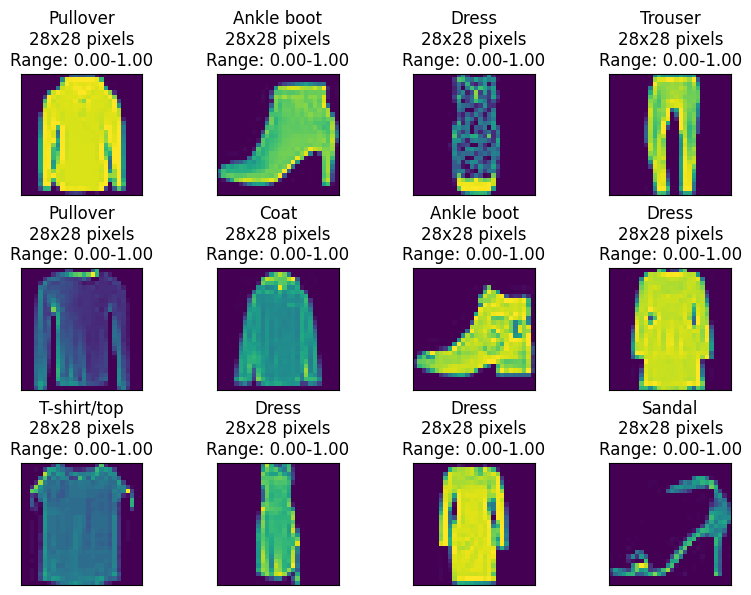

In [74]:

#Defining class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Displaying a 4x4 grid of the first 16 images in the dataset with pixel size and pixel range
plt.figure(figsize=(8, 8))  # Set the size of the figure
for i in range(12):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image, label = new_train_dataset[i]

    min_pixel = image.min().item()
    max_pixel = image.max().item()

    plt.imshow(image.reshape((28,28)).squeeze())
    #plt.imshow(image.squeeze())

    # Display the class name, pixel size, and pixel range in the title
    plt.title(f"{class_names[label]}\n28x28 pixels\nRange: {min_pixel:.2f}-{max_pixel:.2f}")

plt.tight_layout()
plt.subplots_adjust(hspace=0.6)
plt.show()  # Show the 6x6 grid


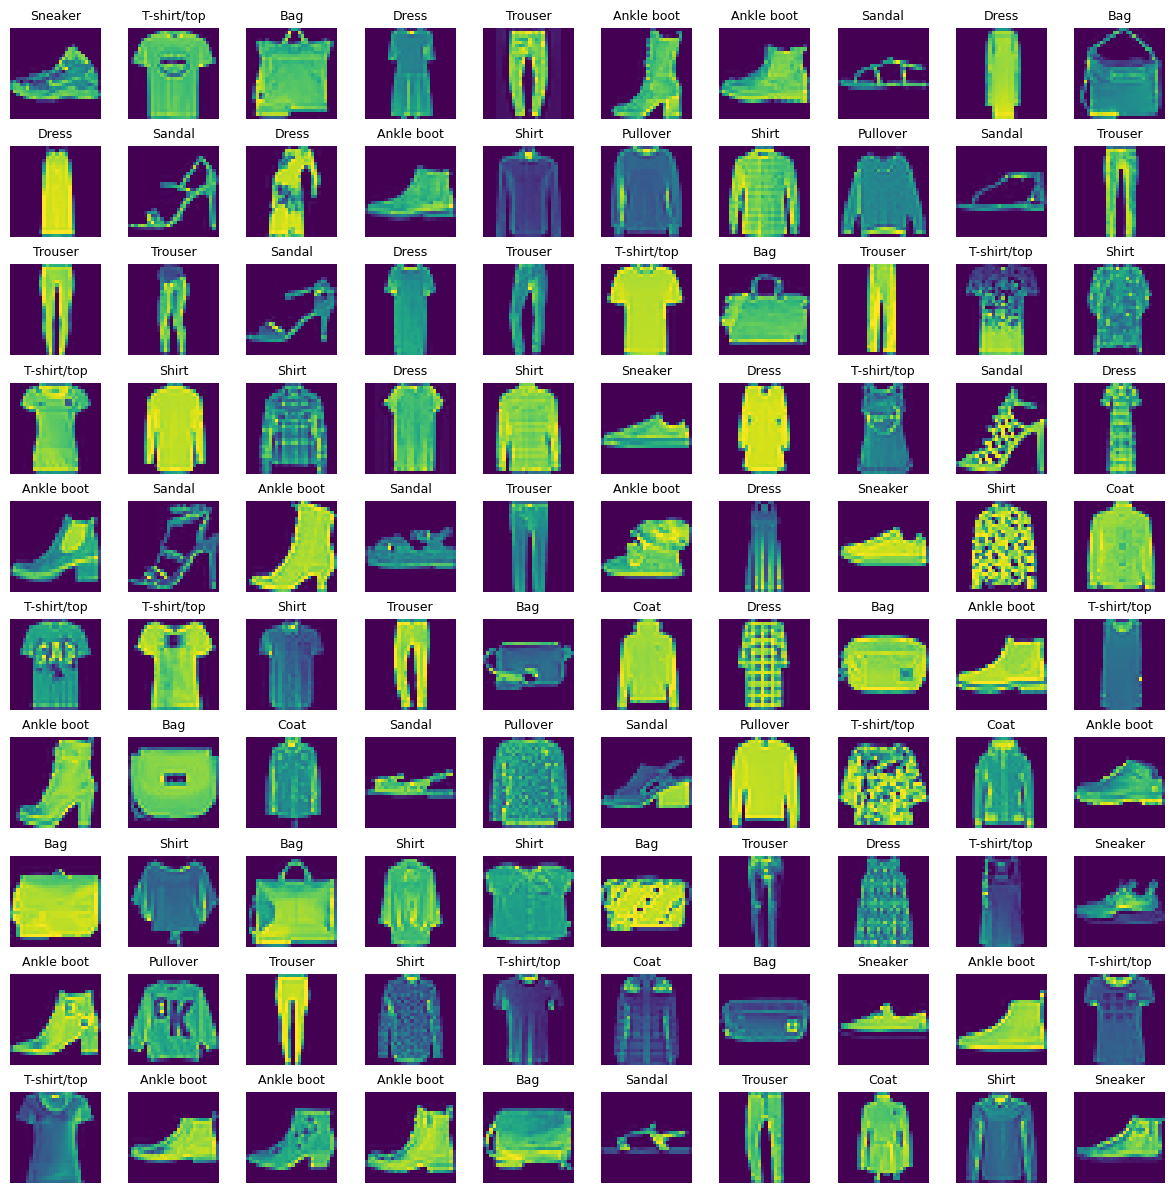

In [75]:
# Now, display a random 15x15 grid of images
W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,15))
axes = axes.ravel() # Flatten the grid to make it easier to access each subplot, 2D to 1D
n_train = len(new_train_dataset)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_train)
    sample_image, sample_label = new_train_dataset[index]
    axes[i].imshow(sample_image.reshape((28,28)))
    axes[i].set_title(class_names[sample_label], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

In [76]:
class CustomModel(nn.Module):
     def __init__(self):
       super(CustomModel, self).__init__()
       self.conv_layer = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=16),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=128),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(),
            )
     def forward(self, x):
            x = self.conv_layer(x)
            return x

In [77]:
# Initialize DataLoaders to retrieve batches of data
train_loader = DataLoader(new_train_dataset, batch_size=64, shuffle=True, drop_last=True)
val_loader = DataLoader(new_validation_dataset, batch_size=64, shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True, drop_last=False)

## Fully Connected Neural Network
### Neural Network Definition
- Defines a fully connected neural network with methods for adding layers, displaying parameters, and performing forward passes.
# NeuralNetwork Class Documentation

The `NeuralNetwork` class implements a fully connected neural network with methods for adding layers, performing feedforward and backpropagation, and calculating accuracy and loss.

### Class: `NeuralNetwork`

#### Attributes:
- **`layers`**: List of tuples, where each tuple contains weights and biases for a layer.
- **`activation_functions`**: List of activation functions used for each layer.
- **`layer_data`**: List of dictionaries containing information about each layer, such as neuron counts, weight and bias sizes, and parameter totals.
- **`activations`**: List of activations for each layer during the feedforward process.

---

### `__init__()`
**Signature**: `def __init__(self)`

Initializes an empty neural network instance with lists to hold layers, activation functions, and layer information.

---

### `addnetwork(input_size, input_layers_config, output_layers_config)`
**Signature**: `def addnetwork(self, input_size, input_layers_config, output_layers_config)`

Adds layers to the neural network.

- **Parameters**:
  - `input_size` (int): Number of input neurons.
  - `input_layers_config` (list of dict): Configuration for input and hidden layers, where each dictionary specifies:
    - `'neurons'`: Number of neurons in the layer.
    - `'activation'`: Activation function (e.g., `'relu'`, `'softmax'`).
  - `output_layers_config` (list of dict): Configuration for the output layer, formatted similarly to `input_layers_config`.

---

### `display_parameters()`
**Signature**: `def display_parameters(self)`

Displays the model parameters as a table for easier inspection of each layer's configuration.

- **Returns**:
  - `DataFrame`: A Pandas DataFrame summarizing layer information, such as neuron counts, weight and bias sizes, and total parameters.

---

### `flatten(X)`
**Signature**: `def flatten(self, X)`

Flattens each input (e.g., image or sample) to a 1D vector.

- **Parameters**:
  - `X` (`numpy.ndarray`): Input data with dimensions `(batch_size, height, width, channels)`.

- **Returns**:
  - `numpy.ndarray`: Flattened data with shape `(batch_size, flattened_size)`.

---

### `relu(x)`
**Signature**: `def relu(self, x)`

Applies the ReLU (Rectified Linear Unit) activation function.

- **Parameters**:
  - `x` (`numpy.ndarray`): Input data.

- **Returns**:
  - `numpy.ndarray`: ReLU-transformed output.

---

### `relu_derivative(x)`
**Signature**: `def relu_derivative(self, x)`

Calculates the derivative of the ReLU function, used during backpropagation.

- **Parameters**:
  - `x` (`numpy.ndarray`): Input data.

- **Returns**:
  - `numpy.ndarray`: Derivative of ReLU, with 1 for positive inputs and 0 otherwise.

---

### `softmax(x)`
**Signature**: `def softmax(self, x)`

Applies the softmax function, converting logits to probabilities.

- **Parameters**:
  - `x` (`numpy.ndarray`): Input data.

- **Returns**:
  - `numpy.ndarray`: Probabilities, normalized across the output dimension.

---

### `feedforward(X)`
**Signature**: `def feedforward(self, X)`

Conducts a feedforward pass through the network, computing activations for each layer.

- **Parameters**:
  - `X` (`numpy.ndarray`): Input data.

- **Returns**:
  - `numpy.ndarray`: Final layer output, representing the network’s predictions.

---

### `compute_loss(yHat, y)`
**Signature**: `def compute_loss(self, yHat, y)`

Calculates cross-entropy loss between predictions and actual values.

- **Parameters**:
  - `yHat` (`numpy.ndarray`): Predicted probabilities (output of softmax).
  - `y` (`numpy.ndarray`): True labels (one-hot encoded).

- **Returns**:
  - `float`: Cross-entropy loss value.

---

### `backwardpass(X, y, yHat, learning_rate=0.01)`
**Signature**: `def backwardpass(self, X, y, yHat, learning_rate=0.01)`

Performs backpropagation to compute and apply gradients to weights and biases.

- **Parameters**:
  - `X` (`numpy.ndarray`): Input data.
  - `y` (`numpy.ndarray`): True labels.
  - `yHat` (`numpy.ndarray`): Predicted output from feedforward.
  - `learning_rate` (float, optional): Learning rate for gradient descent (default is 0.01).

---

### `calculate_accuracy(yHat, y)`
**Signature**: `def calculate_accuracy(self, yHat, y)`

Computes the classification accuracy by comparing predictions with true labels.

- **Parameters**:
  - `yHat` (`numpy.ndarray`): Predicted probabilities.
  - `y` (`numpy.ndarray`): True labels.

- **Returns**:
  - `float`: Classification accuracy, as a decimal.

In [78]:
#Fully connected layer
class NeuralNetwork:

    def __init__(self):
      self.layers = []
      self.activation_functions = []
      self.layer_data = []
      self.activations = []

    def addnetwork(self, input_size, input_layers_config, output_layers_config):

      #addition the first layer
      neurons = input_size  # Same number of neurons as input size
      activation = input_layers_config[0]['activation']
      new_input_layers_config = []

      first_layer_neuron = input_layers_config[0]['neurons']


      # Initialize weights and biases for the first layer
      weights = np.random.randn(input_size, first_layer_neuron)
      bias = np.zeros((1, first_layer_neuron))

      # Store layer information
      self.layer_data.append({
          "Layer": "First Layer",
          "Input Neurons": input_size,
          "Output Neurons": first_layer_neuron,
          "Weights": weights.size,
          "Biases": bias.size,
          "Total Parameters": weights.size + bias.size
      })

      # Append weights, biases, and activation function to the model
      #print(f"first layer weights = {weights.shape}, first layer bias = {bias.shape}")
      self.layers.append((weights, bias))
      self.activation_functions.append(activation)
      current_input_size = first_layer_neuron
      # Addition of hidden layers
      #Initialize the weights and biases for the input layers
      for i, layer in enumerate(input_layers_config[1:], start=1):
        neurons = layer['neurons']
        activation = layer['activation']
        # Initialize weights and biases for the current layer
        weights = np.random.randn(current_input_size, neurons)  # weight initialization
        bias = np.zeros((1, neurons))  # Bias initialization
        # Store layer information
        self.layer_data.append({
          "Layer": f"Hidden Layer {i+1}",
          "Input Neurons": current_input_size,
          "Output Neurons": neurons,
          "Weights": weights.size,
          "Biases": bias.size,
          "Total Parameters": weights.size + bias.size
        })
        # Append weights, biases, and activation function to the model
        self.layers.append((weights, bias))
        self.activation_functions.append(activation)
        # Update current input size for next layer
        current_input_size = neurons
      # Addition of output layers
      # Initialize weights and biases for the output layer
      output_neurons = output_layers_config[0]['neurons']
      output_activation = output_layers_config[0]['activation']
      output_weights = np.random.randn(current_input_size, output_neurons)
      output_bias = np.zeros((1, output_neurons))

      self.layer_data.append({
          "Layer": "Output Layer",
          "Input Neurons": current_input_size,
          "Output Neurons": output_neurons,
          "Weights": output_weights.size,
          "Biases": output_bias.size,
          "Total Parameters": output_weights.size + output_bias.size
        })
      # Append output weights, biases, and activation function
      self.layers.append((output_weights, output_bias))
      self.activation_functions.append(output_activation)

    def display_parameters(self):
      df = pd.DataFrame(self.layer_data)
      return df

    def flatten(self, X):
      batch_size = X.shape[0]
      #Flatten each image/sample to a 1D vector
      return X.reshape(batch_size, -1) # output(batch size, flattened size)

    # Relu activation function
    def relu(self, x):
        return np.maximum(0, x)

    # Derivative of Relu activation function
    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)

    #Softmax function
    def softmax(self, x):
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))

        return exps / np.sum(exps, axis=1, keepdims=True)# Softmax activation


    def feedforward(self, X):
      self.activations = [X]  # Initialize with the input
      for i, layer in enumerate(self.layers):
        # Extract weights and biases for the current layer
        weights, bias = layer
        # Debugging shape of X and weights
        #print(f"Layer {i + 1}: Input X shape: {X.shape}, Weights shape: {weights.shape}, Bias shape: {bias.shape}")
        # Matrix multiplication and bias addition
        X = np.dot(X, weights) + bias
        # Apply activation function
        if self.activation_functions[i] == 'relu':
          X = self.relu(X)
            #X = np.maximum(0, X)  # Using np.maximum for ReLU activation
        elif self.activation_functions[i] == 'softmax':
          X = self.softmax(X)
        # Store the activation for each layer
        self.activations.append(X)
      yHat = X
      return yHat

    def compute_loss(self, yHat, y):
      # Cross-entropy loss
      m = y.shape[0]
      loss = -np.sum(y * np.log(yHat + 1e-9)) / m
      return loss


    def backwardpass(self, X, y, yHat, learning_rate=0.01):
      #print(f"shape of X: {X.shape}, shape of y: {y.shape}, shape of yHat: {yHat.shape}")
      m = y.shape[0]  # Number of examples in the batch
      # Store the derivatives for each layer
      gradients = []
      # Compute the gradient for the output layer (softmax with cross-entropy loss)
      dA = yHat - y  # Gradient of the loss with respect to output (yHat)
      for i in reversed(range(len(self.layers))):
          #print(f"Backward pass round no: {i}")
          weights, bias = self.layers[i]
          activation = self.activation_functions[i]
          # Use the stored activation as the input to this layer
          A_prev = self.activations[i]
          #print(f"Layer {i + 1}: dA shape: {dA.shape}, weights shape: {weights.shape}, bias shape: {bias.shape}")
          # Calculate gradients with respect to weights, biases, and inputs for each layer
          if activation == 'softmax':
              dZ = dA  # dZ for softmax layer
          elif activation == 'relu':
              dZ = dA * self.relu_derivative(self.activations[i + 1])
          # Calculate gradients for weights and biases
          dW = np.dot(A_prev.T, dZ) / m
          db = np.sum(dZ, axis=0, keepdims=True) / m
          #print(f"Layer {i + 1}: A_prev shape: {A_prev.shape}, dA shape: {dA.shape}, dZ shape: {dZ.shape}, weights shape: {weights.shape}, dW shape: {dW.shape}, db shape: {db.shape}")
          """
          # Debugging shapes of dW and db
          # Check if shapes align before updating weights
          if dW.shape != weights.shape:
              raise ValueError(f"Shape mismatch: dW shape {dW.shape} does not match weights shape {weights.shape}")
          if db.shape != bias.shape:
              raise ValueError(f"Shape mismatch: db shape {db.shape} does not match bias shape {bias.shape}")
          """
          # Update the weights and biases
          weights -= learning_rate * dW
          bias -= learning_rate * db
          # Update the layer in the network with the new weights and biases
          self.layers[i] = (weights, bias)
          # Update dA for the next layer in the backpropagation process
          dA = np.dot(dZ, weights.T)


    def calculate_accuracy(self, yHat, y):
        # Calculate accuracy based on predictions and true labels
        pred_classes = np.argmax(yHat, axis=1)
        true_classes = np.argmax(y, axis=1)
        return np.mean(pred_classes == true_classes)


In [79]:
input_layers_config = [
    {'neurons': 128, 'activation': 'relu'},
    #{'neurons': 64, 'activation': 'relu'},
    #{'neurons': 32, 'activation': 'relu'}
]
output_layers_config = [
    {'neurons': 10, 'activation': 'softmax'}
]


In [80]:
# Moving model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Neural Network Initialization and Layer Addition

In this part of the notebook, we initialize our custom model and neural network, and then add layers to the neural network outside the batch loop. Here's a step-by-step explanation of the code:

1. **Model Initialization**:
   ```python
   model = CustomModel().to(device)
   nn_network = NeuralNetwork()
   ```
   - `CustomModel` is instantiated and moved to the specified device (e.g., CPU or GPU).
   - `NeuralNetwork` is instantiated but not yet populated with layers.

2. **Determining the Shape for Layer Addition**:
   ```python
   cnn_output_sample = next(iter(train_loader))[0]  # Get a sample batch to determine the shape
   ```
   - A sample batch is retrieved from `train_loader` to determine the shape of the output feature map from the custom model.

3. **Forward Pass Through the Custom Model**:
   ```python
   cnn_output_sample = model(cnn_output_sample.to(device).type(torch.float32))
   ```
   - The sample batch is passed through the custom model to get the output feature map. The input is moved to the device and converted to `torch.float32`.

4. **Conversion to NumPy Array**:
   ```python
   cnn_output_np_sample = cnn_output_sample.cpu().detach().numpy()
   ```
   - The output feature map is moved back to the CPU, detached from the computational graph, and converted to a NumPy array.

5. **Flattening the Output**:
   ```python
   cnn_output_np_sample = nn_network.flatten(cnn_output_np_sample)
   ```
   - The output feature map is flattened using a method from the `NeuralNetwork` class, preparing it for further processing or layer addition.

By performing these steps outside the batch loop, we ensure that the layer additions and shape calculations are done efficiently, avoiding redundant computations during each batch processing.

In [81]:
model = CustomModel().to(device)
nn_network = NeuralNetwork()
# Adding layers to the neural network outside the batch loop
cnn_output_sample = next(iter(train_loader))[0]  # Get a sample batch to determine the shape
cnn_output_sample = model(cnn_output_sample.to(device).type(torch.float32))
cnn_output_np_sample = cnn_output_sample.cpu().detach().numpy()
cnn_output_np_sample = nn_network.flatten(cnn_output_np_sample)

# Adding layers to the neural network
nn_network.addnetwork(input_size=cnn_output_np_sample.shape[1], input_layers_config=input_layers_config, output_layers_config=output_layers_config)


### Adding Layers to the Neural Network and Initializing Weights & Biases

In this section, we add layers to our neural network and initialize Weights & Biases for experiment tracking. Here's a detailed explanation of the code:

1. **Adding Layers to the Neural Network**:
   - The `addnetwork` method of `nn_network` is called to add layers to the neural network.
   - `input_size` is set to the second dimension of the flattened output sample (`cnn_output_np_sample.shape[1]`), which defines the size of the input layer.
   - `input_layers_config` and `output_layers_config` are configurations for the input and output layers, respectively.


By following these steps, we ensure that our neural network is properly configured and that our experiments are tracked.

### Training Hyperparameters and Training Loop

In this section, we define the training hyperparameters and implement the training loop for the neural network.

1. **Setting Training Hyperparameters**:
   - The learning rate and the number of epochs are retrieved from the Weights & Biases (wandb) configuration.

2. **Monitoring the Model**:
   - `wandb.watch` is used to log the gradients and parameters during training.

3. **Training Loop**:
   - **Epoch Loop**: Iterates over the specified number of epochs.
   - **Batch Loop**: Iterates over each batch in the `train_loader`.
     - **Data Preparation**: Moves input and label data to the selected device and converts labels to one-hot encoding.
     - **Forward Pass**: The input batch is passed through the CNN model, and the output is flattened and fed into the fully connected neural network.
     - **Loss Calculation**: Computes the cross-entropy loss between the predicted and true labels.
     - **Accuracy Calculation**: Calculates the accuracy of the predictions.
     - **Logging Metrics**: Logs the batch loss and accuracy to wandb.
     - **Backpropagation**: Performs backpropagation to update the model weights and biases.
     - **Epoch Metrics**: Calculates and logs the epoch-level loss and accuracy to wandb.

4. **Display Parameters**:
   - Retrieves and displays the neural network parameter DataFrame to summarize the network configuration.

In [82]:
# Set up tracking for metrics
train_accuracies, train_losses, val_accuracies, val_losses = [], [], [], []

# Training Hyperparameters
learning_rate =0.0001
epochs = 1

for epoch in range(epochs):
  print(f"Epoch {epoch + 1}/{epochs}")
  total_train_loss = 0
  correct_train_preds = 0
  total_train_samples = 0

  for i, (x_batch, y_batch) in enumerate( train_loader):

    # Moving input data to the selected device
    x_batch = x_batch.to(device)
    y_batch = y_batch.to(device)

    y_train = y_batch
    y_train = F.one_hot(y_train, num_classes=nc)

    x_batch = x_batch.type(torch.float32)

    # Perform forward pass with x_batch
    #print("x_batch", x_batch.shape)
    cnn_output = model(x_batch)
    cnn_output_np = cnn_output.cpu().detach().numpy()
    cnn_output_np = nn_network.flatten(cnn_output_np)

    # Feedforward pass
    yhat = nn_network.feedforward(cnn_output_np)

    # Compute Loss (Cross-entropy for classification)

    # Labels are in NumPy format
    y_train = y_train.detach().cpu().numpy() if isinstance(y_train, torch.Tensor) else y_train

    loss = nn_network.compute_loss(yhat, y_train)
    total_train_loss += loss


    # Backpropagation to update weights and bias
    nn_network.backwardpass(cnn_output_np, y_train, yhat, learning_rate)

    # Calculate training accuracy
    preds = np.argmax(yhat, axis=1)
    correct_train_preds += np.sum(preds == np.argmax(y_train, axis=1))
    total_train_samples += y_batch.size(0)

  # Average training loss and accuracy for this epoch
  train_loss = total_train_loss / len(train_loader)
  train_accuracy = correct_train_preds / total_train_samples
  train_losses.append(train_loss)
  train_accuracies.append(train_accuracy)

  print(f"loss: {train_loss:.4f}, accuracy: {train_accuracy:.4f}")



  # Validation loop
  total_val_loss = 0
  correct_val_preds = 0
  total_val_samples = 0

  with torch.no_grad():  # Disable gradient calculation for validation
      for x_val_batch, y_val_batch in val_loader:
          x_val_batch = x_val_batch.to(device)
          y_val_batch = y_val_batch.to(device)

          y_val = F.one_hot(y_val_batch, num_classes=nc).type(torch.float32)

          cnn_output_val = model(x_val_batch)
          cnn_output_np_val = cnn_output_val.cpu().detach().numpy()
          cnn_output_np_val = nn_network.flatten(cnn_output_np_val)

          yhat_val = nn_network.feedforward(cnn_output_np_val)

          y_val_np = y_val.cpu().detach().numpy()
          val_loss = nn_network.compute_loss(yhat_val, y_val_np)
          total_val_loss += val_loss

          val_preds = np.argmax(yhat_val, axis=1)
          correct_val_preds += np.sum(val_preds == np.argmax(y_val_np, axis=1))
          total_val_samples += y_val_batch.size(0)

      val_loss = total_val_loss / len(val_loader)
      val_accuracy = correct_val_preds / total_val_samples
      val_losses.append(val_loss)
      val_accuracies.append(val_accuracy)

      print(f"val_loss: {val_loss:.4f}, val_accuracy: {val_accuracy:.4f}")


Epoch 1/1
loss: 17.3912, accuracy: 0.1450
val_loss: 16.3593, val_accuracy: 0.1892


In [83]:
# Retrieve and display the parameter DataFrame
df = nn_network.display_parameters()
print("Parameter Table for Neural Network:")
print(df)

Parameter Table for Neural Network:
          Layer  Input Neurons  Output Neurons  Weights  Biases  \
0   First Layer           2304             128   294912     128   
1  Output Layer            128              10     1280      10   

   Total Parameters  
0            295040  
1              1290  


### Model Evaluation Section

- **Evaluation Mode**: The model is set to evaluation mode using `model.eval()`.
- **Class Names**: Defined a list of class names for classification.
- **Predictions and Labels**: Initialized empty lists to store predictions and true labels.
- **Gradient Calculations**: Disabled gradient calculations for efficient evaluation using `torch.no_grad()`.
- **Data Loading**: Loaded test data and moved it to the selected device.
- **Forward Passes**:
  - Passed data through the CNN and converted the output to a numpy array.
  - Passed the numpy array through the fully connected network to get predictions.
- **Accuracy Calculation**: Calculated accuracy by comparing predictions with true labels.
- **Results**:
  - Printed the test accuracy.
  - Generated and printed a classification report using `classification_report` from `sklearn`.
  - Created a confusion matrix and converted it to a DataFrame for better visualization.
- **Wandb Finishing**: Called `wandb.finish()` to complete the logging process.

In [84]:
from sklearn.metrics import confusion_matrix, classification_report
# Set model to evaluation mode
model.eval()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

all_preds = []
all_labels = []

# Disabling gradient calculations for evaluation
with torch.no_grad():
    correct = 0
    total = 0
    for x_test, y_test in test_loader:

        # Move data to the selected device
        x_test = x_test.to(device)
        y_test = y_test.to(device)

        # Forward pass through CNN
        cnn_output_test = model(x_test.type(torch.float32))

        # Convert to numpy and flatten if needed
        cnn_output_test_np = nn_network.flatten(cnn_output_test.cpu().detach().numpy())


        # Forward pass through fully connected network
        y_pred = nn_network.feedforward(cnn_output_test_np)

        # Calculate accuracy
        predicted = np.argmax(y_pred, axis=1)
        correct += (predicted == y_test.cpu().numpy()).sum()
        total += y_test.size(0)

        all_preds.extend(predicted)
        all_labels.extend(y_test.cpu().numpy())

# Print accuracy
accuracy = 100 * correct / total
print(f"Accuracy score is: {accuracy:.2f}%")

Accuracy score is: 19.99%


In [85]:
# Calculate and print confusion matrix and classification report
class_report = classification_report(all_labels, all_preds, target_names=class_names, zero_division=0)
print("\nClassification Report:")
print(class_report)

pd.DataFrame(confusion_matrix(all_labels, all_preds),index=class_names, columns=class_names)


Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.14      0.16      0.15      1000
     Trouser       0.36      0.41      0.38      1000
    Pullover       0.19      0.21      0.20      1000
       Dress       0.14      0.14      0.14      1000
        Coat       0.12      0.12      0.12      1000
      Sandal       0.30      0.28      0.29      1000
       Shirt       0.11      0.10      0.10      1000
     Sneaker       0.26      0.23      0.25      1000
         Bag       0.16      0.15      0.16      1000
  Ankle boot       0.21      0.19      0.20      1000

    accuracy                           0.20     10000
   macro avg       0.20      0.20      0.20     10000
weighted avg       0.20      0.20      0.20     10000



,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,158,106,101,98,116,33,233,55,77,23
Trouser,19,408,2,202,122,7,37,31,24,148
Pullover,104,68,210,120,209,17,89,58,104,21
Dress,123,264,12,141,105,34,111,53,107,50
Coat,233,28,223,116,121,13,95,53,101,17
Sandal,40,53,73,43,7,284,132,121,143,104
Shirt,183,65,157,88,191,39,99,59,76,43
Sneaker,68,13,56,142,27,147,56,230,66,195
Bag,95,52,209,30,97,124,27,80,154,132
Ankle boot,97,65,91,11,20,252,20,136,114,194


In [86]:
summary(model, input_size=(1, 28, 28))
print("Output shape:", cnn_output.shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
       BatchNorm2d-2           [-1, 16, 28, 28]              32
              ReLU-3           [-1, 16, 28, 28]               0
         MaxPool2d-4           [-1, 16, 14, 14]               0
            Conv2d-5           [-1, 32, 14, 14]           4,640
       BatchNorm2d-6           [-1, 32, 14, 14]              64
              ReLU-7           [-1, 32, 14, 14]               0
         MaxPool2d-8             [-1, 32, 7, 7]               0
            Conv2d-9             [-1, 64, 7, 7]          18,496
      BatchNorm2d-10             [-1, 64, 7, 7]             128
             ReLU-11             [-1, 64, 7, 7]               0
        MaxPool2d-12             [-1, 64, 3, 3]               0
           Conv2d-13            [-1, 128, 3, 3]          73,856
      BatchNorm2d-14            [-1, 12

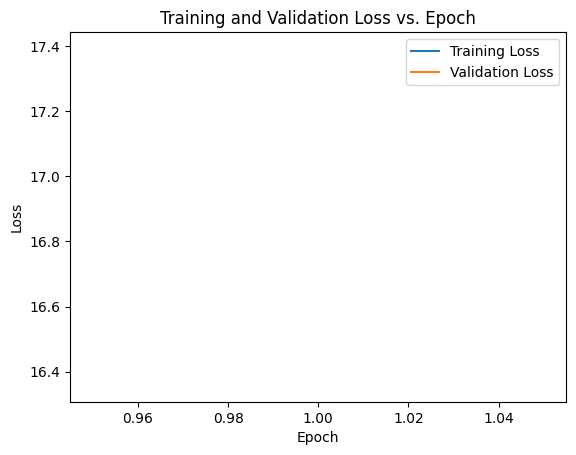

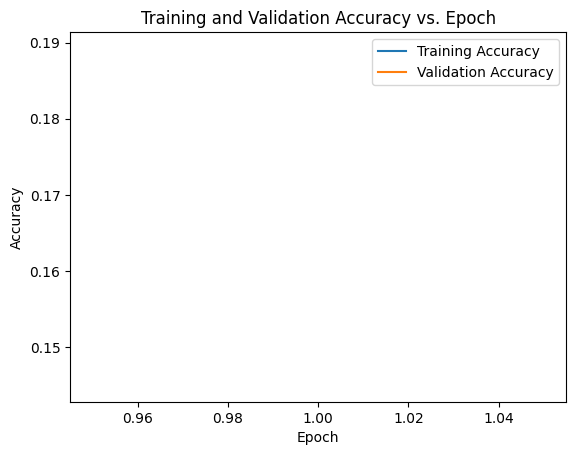

In [87]:
epochs = range(1, len(train_losses) + 1)

# Training and Validation Loss vs. Epoch
#plt.figure(figsize=(8, 6))
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Epoch')
plt.legend()
plt.show()

# Training and Validation Accuracy vs. Epoch
#plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Epoch')
plt.legend()
plt.show()